<a href="https://colab.research.google.com/github/kulkarnishreya/Video-Game-Sales/blob/main/Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Motive
* Perform basic queries on pandas DataFrame objects.
* Create simple data visualizations using pandas.


### Video Game Sales

In this part of the assignment I am working with a data-set of video game sales from 1980 - 2020. 

First, head towards [kaggle.com](https://www.kaggle.com/gregorut/videogamesales) and have a preview of the data-set. Then, download [vgsales.csv](https://drive.google.com/file/d/1jsHwBwXDkeRbQZONJjNCog725Sa_zezz/view?usp=sharing) and upload it into Colab. 

Here is a brief summary of the columns:

* `Rank`: The ranking of overall sales of this video game. (i.e., \#1 is the top seller)

* `Name`: The game's name

* `Platform`: The platform of the game's release 

* `Year`: Year of the game's release

* `Genre`: Genre of the game

* `Publisher`: Publisher of the game

* `NA_Sales`: Sales in North America (in millions of units sold)

* `EU_Sales`: Sales in Europe (in millions of units sold)

* `JP_Sales`: Sales in Japan (in millions of units sold)

* `Other_Sales`: Sales in the rest of the world (in millions of units sold)

* `Global_Sales`: Total worldwide sales

E1. Loading the data-set in Colab. Importing the pandas library as `pd`.

In [4]:
import pandas as pd 

df = pd.read_csv('vgsales.csv') 

E2. Calling `describe` on the DataFrame to get a statistical summary on all of the columns

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


E3. Calling `info` on the DataFrame to get a summary on each column's inferred data type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


E4. The year is a `float`? That doesn't make sense. To take care of this and remove some invalid rows:

1. Deleting rows that have a missing `Year` attribute:  `df = df[df['Year'].notna()].copy()`

1. Replacing all the remaining `float` values with integers: `df['Year'] = df['Year'].astype('int64')`



In [7]:
df = df[df['Year'].notna()].copy()
df['Year'] = df['Year'].astype('int64')

E5. Calling `head` to inspect the first 5 rows of the data-set.


In [8]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


E6. Calling `tail` to inspect the last **10** rows of the data-set.


In [9]:
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


E7. Displaying the first 10 entries of the `Name` column only.

In [10]:
df['Name'].head(10)

0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: Name, dtype: object

E8. Displaying the first 10 rows of the `Name`, `Platform`, `Publisher`, and `Year` columns only, in that order.

In [11]:
cols = ['Name', 'Platform', 'Publisher', 'Year']
df[cols].head(10)

,Name,Platform,Publisher,Year
0,Wii Sports,Wii,Nintendo,2006
1,Super Mario Bros.,NES,Nintendo,1985
2,Mario Kart Wii,Wii,Nintendo,2008
3,Wii Sports Resort,Wii,Nintendo,2009
4,Pokemon Red/Pokemon Blue,GB,Nintendo,1996
5,Tetris,GB,Nintendo,1989
6,New Super Mario Bros.,DS,Nintendo,2006
7,Wii Play,Wii,Nintendo,2006
8,New Super Mario Bros. Wii,Wii,Nintendo,2009
9,Duck Hunt,NES,Nintendo,1984


E9. Displaying the top 10 titles released by the publisher Activision. Displaying all the columns.

In [12]:
 cond = df['Publisher'] == 'Activision'
df[cond].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
61,62,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21


E10. Displaying the `Rank`, `Name`, `Platform` and `Year` columns, in that order.

In [13]:
cond = df['Publisher'] == 'Activision'
cols = ['Rank', 'Name', 'Platform', 'Year']
df[cond][cols].head(10)

,Rank,Name,Platform,Year
29,30,Call of Duty: Modern Warfare 3,X360,2011
31,32,Call of Duty: Black Ops,X360,2010
33,34,Call of Duty: Black Ops 3,PS4,2015
34,35,Call of Duty: Black Ops II,PS3,2012
35,36,Call of Duty: Black Ops II,X360,2012
36,37,Call of Duty: Modern Warfare 2,X360,2009
37,38,Call of Duty: Modern Warfare 3,PS3,2011
40,41,Call of Duty: Black Ops,PS3,2010
55,56,Call of Duty: Modern Warfare 2,PS3,2009
61,62,Call of Duty: Ghosts,X360,2013


E11. Displaying the first 15 games in the *Call of Duty* series present in the data-set. 

In [14]:
df[df['Name'].str.startswith('Call of Duty')].head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
36,37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
55,56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
61,62,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21


E12. Computing the sum of the North American sales of all the *Call of Duty* games. 

In [15]:
df[df['Name'].str.startswith('Call of Duty')]['NA_Sales'].sum()

127.61999999999999

E13. Computing the sum of the North American sales of all the *Call of Duty* games  sold during the years 2008-2012.

In [16]:
cond = df['Year'] >= 2008
cond2 = df['Year'] <= 2012
df[df['Name'].str.startswith('Call of Duty')]['NA_Sales'][cond][cond2].sum()

72.47999999999999

E14. Displaying all columns for any game containing the word "Mario" that was available for the Wii platform. 

In [17]:
name = df['Name']
mario = name.str.contains('Mario') 
wii = df['Platform'] == 'Wii'
df[mario & wii]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
48,49,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
80,81,Mario Party 8,Wii,2007,Misc,Nintendo,3.81,2.30,1.58,0.73,8.42
85,86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.06
91,92,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.69
233,234,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58
323,324,Mario & Sonic at the London 2012 Olympic Games,Wii,2011,Sports,Sega,1.14,1.91,0.27,0.46,3.78
329,330,Super Paper Mario,Wii,2007,Platform,Nintendo,1.98,0.88,0.59,0.32,3.76
405,406,Mario Party 9,Wii,2012,Misc,Nintendo,1.15,1.17,0.76,0.24,3.32


E15. Displaying all rows for any `Sports` game containing the word "Mario" that was available for the Wii platform. 

In [18]:
name = df['Name']
mario = name.str.contains('Mario') 
sports = df['Genre'] == 'Sports'
wii = df['Platform'] == 'Wii'
df[mario & sports & wii]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
85,86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.06
233,234,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58
323,324,Mario & Sonic at the London 2012 Olympic Games,Wii,2011,Sports,Sega,1.14,1.91,0.27,0.46,3.78
581,582,Mario Strikers Charged,Wii,2007,Sports,Nintendo,1.07,1.06,0.24,0.25,2.62
781,783,Mario Sports Mix,Wii,2010,Sports,Nintendo,0.90,0.45,0.63,0.13,2.11
892,894,Mario Super Sluggers,Wii,2008,Sports,Nintendo,1.51,0.00,0.29,0.12,1.93
1275,1277,New Play Control! Mario Power Tennis,Wii,2009,Sports,Nintendo,0.37,0.69,0.28,0.14,1.48
12123,12125,Mario Tennis,Wii,2010,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07


E16. Displaying all rows for any *sports* game containing the word "Mario" that was available for the Wii platform and was published by Nintendo itself.

In [19]:
name = df['Name']
mario = name.str.contains('Mario') 
sports = df['Genre'] == 'Sports'
wii = df['Platform'] == 'Wii'
nintendo = df['Publisher'] == 'Nintendo'
df[mario & sports & wii & nintendo]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
581,582,Mario Strikers Charged,Wii,2007,Sports,Nintendo,1.07,1.06,0.24,0.25,2.62
781,783,Mario Sports Mix,Wii,2010,Sports,Nintendo,0.90,0.45,0.63,0.13,2.11
892,894,Mario Super Sluggers,Wii,2008,Sports,Nintendo,1.51,0.00,0.29,0.12,1.93
1275,1277,New Play Control! Mario Power Tennis,Wii,2009,Sports,Nintendo,0.37,0.69,0.28,0.14,1.48
12123,12125,Mario Tennis,Wii,2010,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07


E17. Displaying all info about all Pokemon games. (Search the `Name` column for "Pokemon".) 

In [20]:
name = df['Name']
pokemon = name.str.contains('Pokemon') 
df[pokemon]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
81,82,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33


E18. Displaying all info about all Pokemon games that were released for the Nintendo DS or 3DS. 

In [21]:
name = df['Name']
pokemon = name.str.contains('Pokemon') 
nintendo_ds = df['Platform'] == 'DS'
nintendo_3ds =  df['Platform'] == '3DS'
df[(pokemon) & (nintendo_ds | nintendo_3ds)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
81,82,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33
209,210,Pokemon Mystery Dungeon: Explorers of Time/Exp...,DS,2007,Role-Playing,Nintendo,1.85,1.20,1.54,0.37,4.96
692,694,Pokemon Ranger: Shadows of Almia,DS,2008,Role-Playing,Nintendo,0.95,0.54,0.62,0.18,2.30
750,752,Pokemon Ranger,DS,2006,Role-Playing,Nintendo,1.29,0.04,0.73,0.12,2.18
1178,1180,Pokemon Mystery Dungeon: Explorers of Sky,DS,2009,Role-Playing,Nintendo,0.58,0.44,0.44,0.12,1.58


E19. Using the [`isin`](https://www.askpython.com/python-modules/pandas/pandas-isin) function instead of the `|` operator. 

In [22]:
pokemon = df[name.str.contains('Pokemon')]
pokemon_nintendo = pokemon[pokemon['Publisher']== 'Nintendo']
pokemon_ds = pokemon_nintendo[pokemon_nintendo['Platform'].isin(['DS', '3DS'])]
pokemon_ds

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
81,82,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.33
209,210,Pokemon Mystery Dungeon: Explorers of Time/Exp...,DS,2007,Role-Playing,Nintendo,1.85,1.20,1.54,0.37,4.96
692,694,Pokemon Ranger: Shadows of Almia,DS,2008,Role-Playing,Nintendo,0.95,0.54,0.62,0.18,2.30
750,752,Pokemon Ranger,DS,2006,Role-Playing,Nintendo,1.29,0.04,0.73,0.12,2.18
1178,1180,Pokemon Mystery Dungeon: Explorers of Sky,DS,2009,Role-Playing,Nintendo,0.58,0.44,0.44,0.12,1.58


E20. Using `groupby` to display the number of games released for each platform over the entire data-set.

In [23]:
df.groupby(['Platform']).size()

Platform
2600     116
3DO        3
3DS      500
DC        52
DS      2133
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       943
PCFX       1
PS      1189
PS2     2127
PS3     1304
PS4      336
PSP     1197
PSV      412
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1290
WiiU     143
X360    1235
XB       803
XOne     213
dtype: int64

E21. Repeating the previous exercise, but this time using the `value_counts` function.

In [24]:
df['Platform'].value_counts()

DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

E22. Displaying the total North American sales for each platform. 

In [25]:
group_NASales = df.groupby('Platform')['NA_Sales'].sum()
group_NASales.head()

Platform
2600     80.78
3DO       0.00
3DS      78.03
DC        5.43
DS      388.56
Name: NA_Sales, dtype: float64

E23. Repeating the previous exercise, but sort the sales figures by descending value. The top two values should by the Xbox 360 and PS2 with values of 594.33 and 572.92, respectively.

In [26]:
group_NASales_desc = group_NASales.sort_values(ascending=False)
group_NASales_desc.head()

Platform
X360    594.33
PS2     572.92
Wii     497.37
PS3     388.90
DS      388.56
Name: NA_Sales, dtype: float64

E24. Grouping the data-set first by platform, then by year. Compute the sum of the North American sales for each group. The output should contain 241 rows, but pandas will show just the first 5 and last 5 rows. For the Atari 2600, there should be 10.59 million sales in 1980 and 33.40 in 1981.

In [27]:
df.groupby(['Platform', 'Year'])['NA_Sales'].sum()

Platform  Year
2600      1980    10.59
          1981    33.40
          1982    26.92
          1983     5.44
          1984     0.26
                  ...  
XB        2008     0.13
XOne      2013    11.80
          2014    30.41
          2015    34.29
          2016     6.69
Name: NA_Sales, Length: 241, dtype: float64

E25. Repeating the previous exercise, but showing groups only for the years 2014 and later. The output should contain 32 groups.

In [28]:
df[df['Year'] >= 2014].groupby(['Platform', 'Year'])['NA_Sales'].sum()

Platform  Year
3DS       2014    12.03
          2015     5.82
          2016     0.83
DS        2014     0.02
          2020     0.27
PC        2014     3.40
          2015     2.20
          2016     0.84
PS3       2014    16.12
          2015     4.76
          2016     0.40
PS4       2014    34.09
          2015    40.76
          2016    11.86
          2017     0.00
PSP       2014     0.00
          2015     0.00
PSV       2014     3.21
          2015     0.54
          2016     0.19
          2017     0.00
Wii       2014     1.82
          2015     0.57
WiiU      2014    10.78
          2015     6.77
          2016     1.49
X360      2014    20.09
          2015     7.11
          2016     0.36
XOne      2014    30.41
          2015    34.29
          2016     6.69
Name: NA_Sales, dtype: float64

E26. Using `groupby` to generate a list of the total number of games produced in each genre. The first value should be for Action games and should be 3253.

In [29]:
df.groupby(['Genre']).size()

Genre
Action          3253
Adventure       1276
Fighting         836
Misc            1710
Platform         876
Puzzle           571
Racing          1226
Role-Playing    1471
Shooter         1282
Simulation       851
Sports          2304
Strategy         671
dtype: int64

E27. Creating a bar chart of the value produced by the previous exercise. The chart should resemble the figure below.

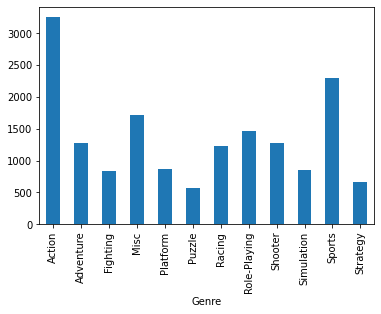

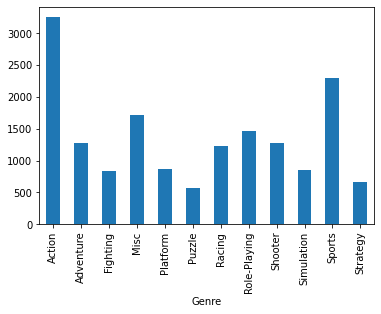

In [30]:
df.groupby(['Genre']).size().plot.bar()

E28. Grouping the data-set first by platform, then by genre. Creating a stacked bar chart of these values. The chart should resemble the figure below.

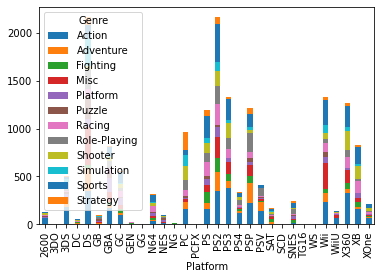

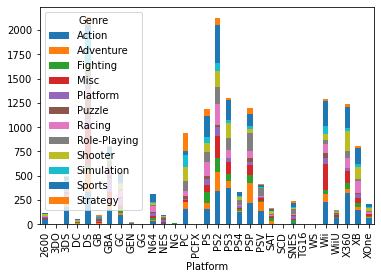

In [31]:
df.groupby(['Platform', 'Genre']).size().unstack().plot.bar(stacked=True)

E29. The chart above is really too busy. Recreating the stacked bar chart, but only for the genres `Adventure`, `Action`, `Racing` and `Sports`. The chart should resemble the figure below.

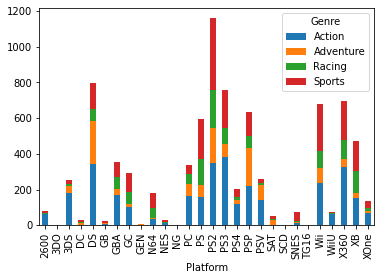

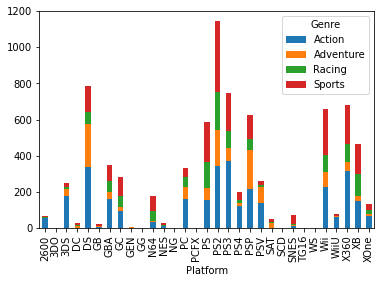

In [32]:
newdf = df.groupby(['Platform', 'Genre']).size().unstack()
newdf = newdf[['Action', 'Adventure', 'Racing', 'Sports']]
newdf.plot.bar(stacked = True)

E30. The chart above still contains a lot of detail. Redrawing it, showing only the totals for the `PS`, `PS2`, `PS3` and `PS4`. Again including only the genres `Adventure`, `Action`, `Racing` and `Sports`. The chart should resemble the figure below.

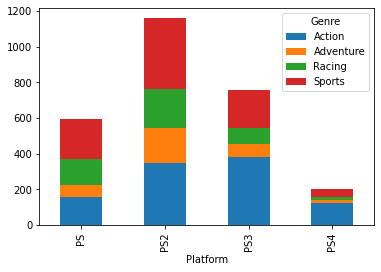

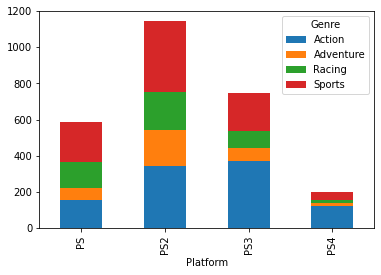

In [33]:
newdf = newdf.loc[['PS', 'PS2', 'PS3', 'PS4'], :]
newdf.plot.bar(stacked=True)

E31. Recreating the chart from the previous exercise, but grouping first by genre, then platform.

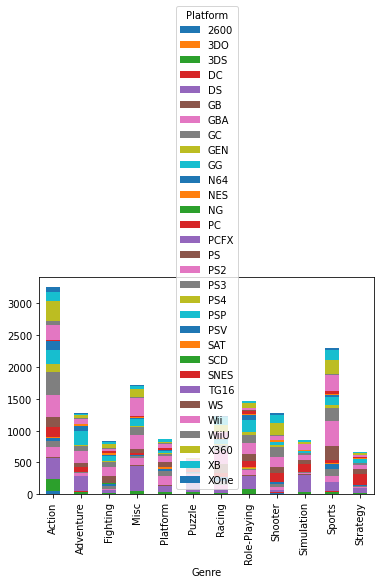

In [34]:
df.groupby(['Genre', 'Platform']).size().unstack().plot.bar(stacked=True)

E32. Creating a time series as a bar chart of the total sales (grouped by `Year`). Seting the `figsize` argument of the `bar` function so that the year labels are legible.

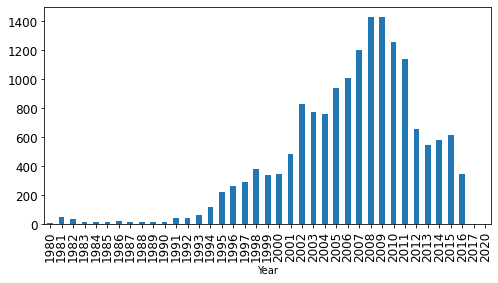

In [35]:
df.groupby(['Year']).size().plot.bar(figsize=(8,4), fontsize=12)

E33. Creating a histogram of the `Global_Sales` column for those games published by Nintendo. Using 100 bins. You will see a large spike for the leftmost bin.

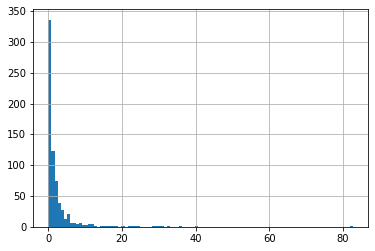

In [36]:
publisher = df['Publisher'] == 'Nintendo'
df['Global_Sales'][publisher].hist(bins = 100)

E34. Repeating the previous exercise, but this time restrict the `Global_Sales` value to be at least 5 million. This column is already in units of millions.

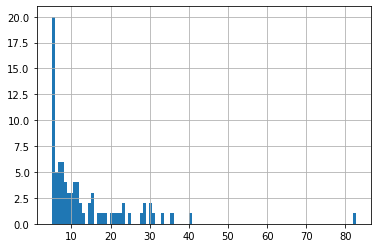

In [37]:
cond = df['Global_Sales'] >= 5
publisher = df['Publisher'] == 'Nintendo'
df['Global_Sales'][publisher][cond].hist(bins = 100)

E35. In a single figure, ploting four line graphs to visualize time series that show how many games were released on each of the `Platform`s named `PS`, `PS2`, `PS3` and `PS4`. Restricting the year to be $\le$ 2016. The graph should resemble the following.

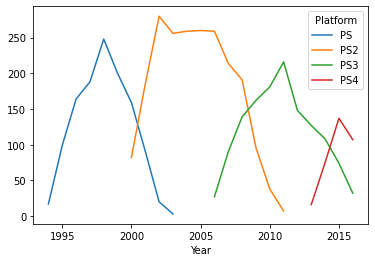

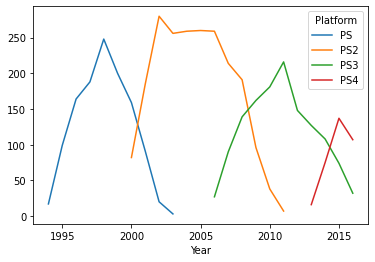

In [38]:
df[(df['Year']<=2016) & (df['Platform'].isin(['PS','PS2','PS3','PS4']))].groupby(['Year','Platform']).size().unstack().plot()

E36. Creating an area chart that shows the number of games published by Activision in the time period 2000 through 2016 in the `Action`, `Adventure` and `Shooter` genres. Adjusting the `figsize` argument of the `area` function so that the chart resembles the figure below. 

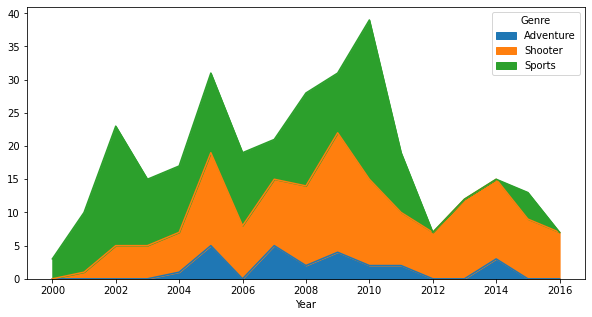

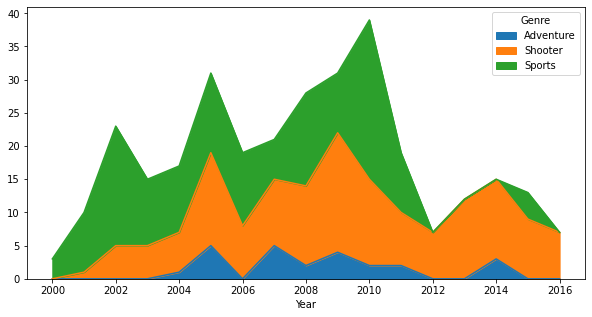

In [39]:
df[(df['Year'].between(2000,2016)) & (df['Publisher'] == 'Activision') & (df['Genre'].isin(['Adventure', 'Shooter','Sports']))].groupby(['Year', 'Genre']).size().unstack().plot(kind = 'area',figsize=(10,5))

E37. Repeating the previous exercise with two changes:

* Use `line` instead of `area`.
* Display only the `Sports` time series.

The chart should resemble the figure below:

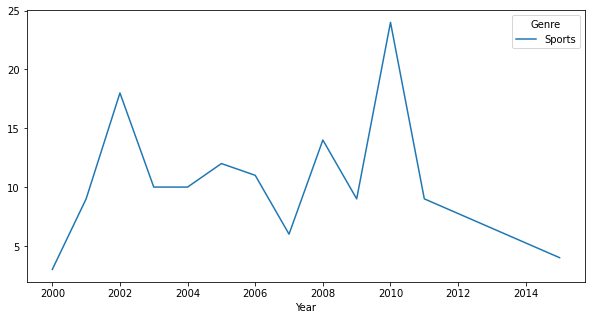

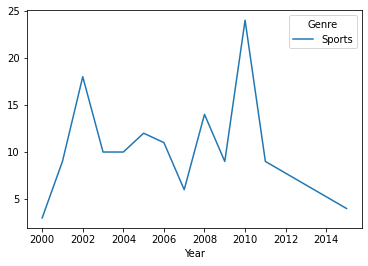

In [40]:
df[(df['Year'].between(2000,2016)) & (df['Publisher']=='Activision') & (df['Genre']== 'Sports')].groupby(['Year','Genre']).size().unstack().plot(legend=True)

E38. Creating a new line graph that shows the percentage increase or decrease from one year to the next. Accomplishing this using a combination of the `shift` function described in Module 21, along with the formula that computes the percentage change in a value from one step to the next:

$$\% change = 100 \times \frac{new\_value - old\_value}{old\_value}$$

In our case, $new\_value$ is the original `Sports` values from the data-set, and $old\_value$ is the original `Sports` values after shifting them down by 1 row via `shift`.

Seting the `xlabel` to read `% Change Year over Year`. 

The chart should resemble the figure below:

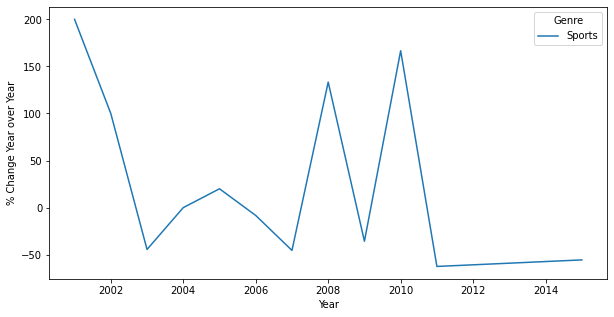


E39. Creating a pie chart that depicts the total Global Sales for each platform in 2010. Using the `label` argument of the `pie` function to change the chart title to read "Global Sales in Millions". To add  percentage labels to the pie wedges, including the argument `autopct='%d%%'` in your list of arguments to the `pie` function. Adding `fontsize=12` to the list of arguments to tweak the font size.The chart should resemble the figure below.

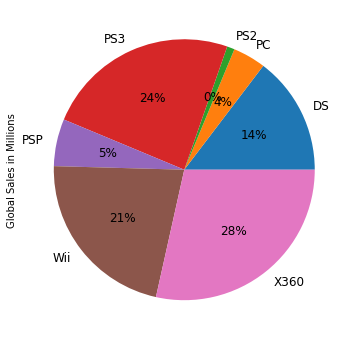

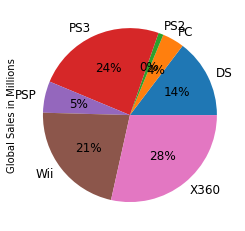

In [41]:
df[df['Year']==2010].groupby('Platform').sum()['Global_Sales'].plot.pie(autopct='%d%%',fontsize=12, label= 'Global Sales in Millions')

E40. Creating a horizontal bar chart that resembles the figure below. The chart should display the same data as shown above, except that the absolute Global Sales figures will be displayed instead of percentages.

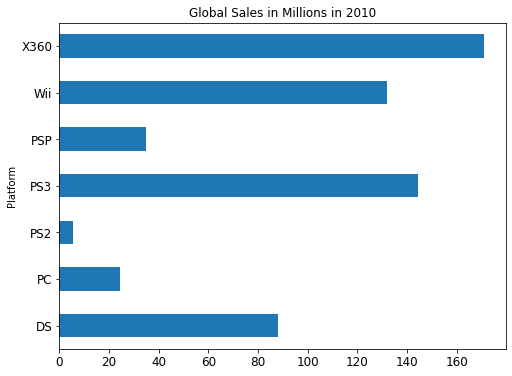

Text(0.5, 1.0, 'Global Sales in Millions')

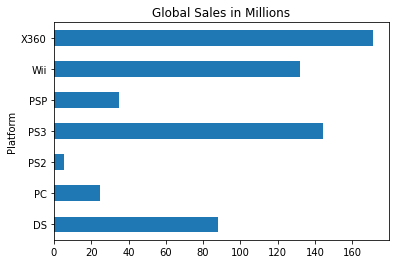

In [42]:
chart = df[df['Year']==2010].groupby('Platform').sum()['Global_Sales'].plot.barh()
chart.set_title('Global Sales in Millions')

E41. Creating a scatterplot of the `NA_Sales` vs. `EU_Sales`. The lower-left corner will be quite dense with points. There will be several notable outliers.

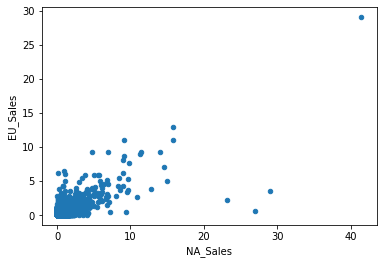

In [43]:
df.plot.scatter(x='NA_Sales', y='EU_Sales')

E42. Repeating the previous exercise, but restricting the games to those which sold at least 2 million units in both North America and the European Union.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


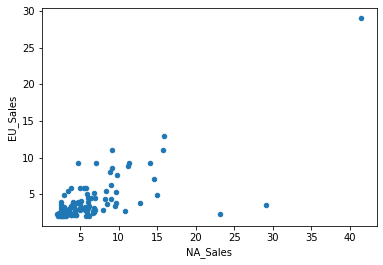

In [44]:
cond = df['NA_Sales'] >= 2
cond2 = df['EU_Sales'] >= 2
plot = df[cond][cond2].plot.scatter(x='NA_Sales', y='EU_Sales')

E43. Computing a correlation matrix for just the `NA_Sales`, `EU_Sales` and `JP_Sales` columns. 

In [45]:
newdf = df[['NA_Sales', 'EU_Sales', 'JP_Sales']]
newdf.corr()

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.768936,0.451285
EU_Sales,0.768936,1.000000,0.436414
JP_Sales,0.451285,0.436414,1.000000


E44. Recomputing the same correlations but now restrict the `Year` to be $\ge$ 2010. 

In [46]:
newdf = df[['NA_Sales', 'EU_Sales', 'JP_Sales']]
cond = df['Year'] >= 2010
newdf[cond].corr()

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.777075,0.247742
EU_Sales,0.777075,1.000000,0.278686
JP_Sales,0.247742,0.278686,1.000000
